# Verification of density profile with an exponential profile

Reference: Candlish et al. 2014; MNRAS 437, 3702-3717 (2014)
Potential is of the form:
\begin{equation}
\Phi(R, z) = 2 \pi G \Sigma_0 e^{\frac{-R}{R_d}} \left(z_0 e^{\frac{-|z|}{z_0}} + |z| \right),
\end{equation}
where $R_d$ and $z_0$ are the scales, and $\Sigma_0$ is a constant surface mass density term.
Density is of the form:
\begin{equation}
\rho(R, z) = \frac{\rho_d}{e} e^{\frac{-R}{R_d}} \left[e^{\frac{-|z|}{z_0}} + \left[\left(\frac{z_0}{R_d}\right) \left(\frac{z_0}{R}\right) e^{\frac{-|z|}{z_0}} + \left(\frac{z_0}{R_d}\right)\left(\frac{|z|}{R}\right)\right] \right] \left(\frac{R}{R_d} - 1 \right),
\end{equation}
where $\rho_d = \rho(R_d, 0)$

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from modules import TimingTools as TT
from astropy import units as u

## Reading scale lengths obtained from density profile fitting

In [20]:
logrho0, e_logrho0, H, e_H, z0, e_z0 = np.load('./data/density_profile_params.npy')

H = H*u.kpc
z0 = z0*u.kpc

## Verification

In [21]:
r = np.linspace(0.1, 10, 100)*u.kpc
z = np.linspace(0, 1.5, 100)*u.kpc

### Radial density profile

In [22]:
logrhor_actual = TT.log_rad_density(r, logrho0, H)
rho_d = (10**8.6)*u.Msun/u.kpc/u.kpc #set by trial and error
logrhor_exp = np.log10(TT.exp_rho(r, 0*u.kpc, H, z0, rho_d).value)

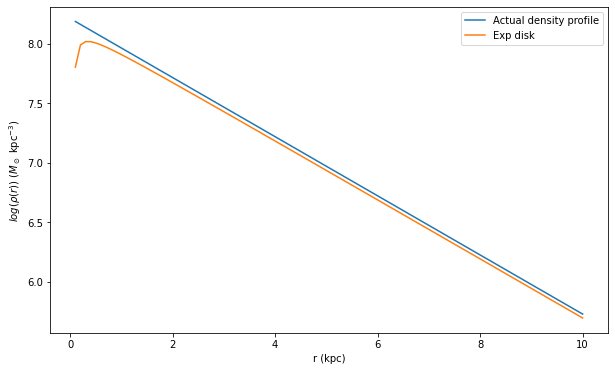

In [23]:
plt.figure(figsize = (10,6))

plt.plot(r, logrhor_actual, label = 'Actual density profile')
plt.plot(r, logrhor_exp, label = 'Exp disk')
plt.xlabel('r (kpc)')
plt.ylabel(r'$log(\rho(r))$ ($M_\odot$ kpc$^{-3}$)')
plt.legend()
plt.show()

### Vertical density profile

In [24]:
logrhoz_actual = TT.log_vert_density(z.value, logrho0, z0.value)
logrhoz_exp = np.log10(TT.exp_rho(0.1*u.kpc, z, H, z0, rho_d).value)

/tmp/ipykernel_6313/830756303.py:2: RuntimeWarning: invalid value encountered in log10
  logrhoz_exp = np.log10(TT.exp_rho(0.1*u.kpc, z, H, z0, rho_d).value)


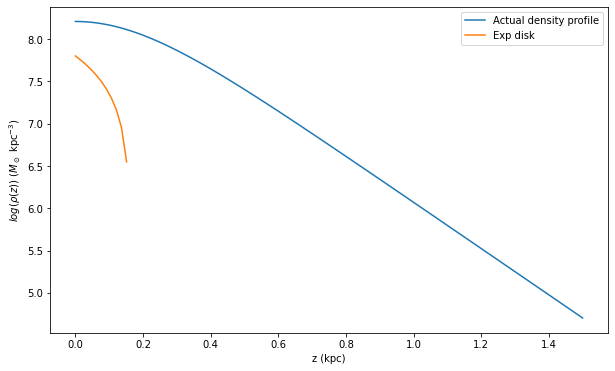

In [25]:
plt.figure(figsize = (10,6))

plt.plot(z, logrhoz_actual, label = 'Actual density profile')
plt.plot(z, logrhoz_exp, label = 'Exp disk')
plt.xlabel('z (kpc)')
plt.ylabel(r'$log(\rho(z))$ ($M_\odot$ kpc$^{-3}$)')
plt.legend()
plt.show()